### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the final section of this lesson.


(1) What is the independent variable? What is the dependent variable?

The __independent variable__ is the congruency between the font color and the words name.  <br>
The __dependent variable__ is the time taken to name the word font color (Response/reaction time). 

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

__Null hypothesis__: <br>
There is no difference between the incongruent cases and congruent cases response time or
there is a decrease in the amount of time taken to name the word printed color of incongruent words than to name the printed color of congruent words.<br><br> 

__Alternative Hypothesis__:

There is an increase in the amount of time it takes to identify and name the printed color of incongruent words.<br>

$$ H_0: \mu_i - \mu_c \leq 0  $$
$$  H_1: \mu_i - \mu_c > 0  $$

Where $\mu_i$ is the incongruent cases group population mean <br>
and $\mu_c$ is the congruent cases group population mean <br>
<br> we will compare the mean of 2 populations.


(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

__Measure of central Tendency__:

__mean__: <br>
congruent sample mean: __14.051__<br>
incongruent sample mean: __22.016__ <br>

__median__: <br>
congruent sample median: __14.356__<br> 
incongruent sample median: __21.017__ <br> 

__Measure of Variability__:<br>

__standard deviation__:<br>
congruent sample Standard deviation : __3.559__<br>
incongruent sample Standard deviation: __4.797__







In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('stroopdata.csv')
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 424.0 bytes


In [4]:
#measure of Central tendency
congruent_median = df['Congruent'].median()
incongruent_median = df['Incongruent'].median()
print ('congruent median: {0}, incongruent median: {1}'.format(congruent_median, incongruent_median))

congruent median: 14.3565, incongruent median: 21.0175


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

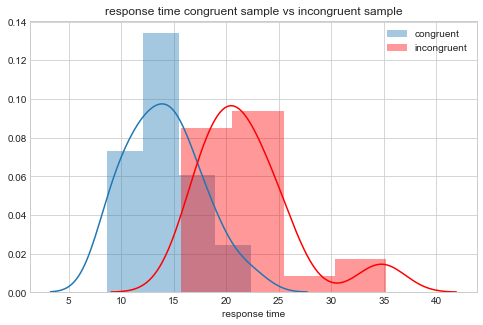

In [5]:
# kde+histogram
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
g=sns.distplot(df['Congruent'], axlabel= 'response time', label='congruent', bins=4)
g=sns.distplot(df['Incongruent'], color='red', label='incongruent', bins=4)
g.set(xlabel='response time')
g.set_title('response time congruent sample vs incongruent sample')
g.legend();


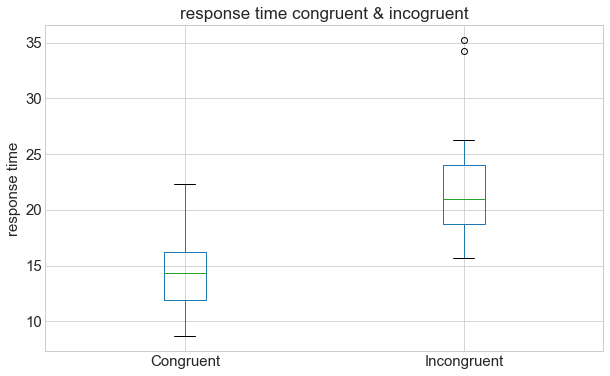

In [6]:
#Boxplot
ax=df.plot(kind='box', figsize=[10,6], fontsize=15);
ax.set_ylabel("response time", fontsize=15)
ax.set_title("response time congruent & incogruent", fontsize=17);

From the histogram we can say that the congruent sample tend to have an almost symmetrical distribution and from the measure of central tendency we had median=14.356 a little bit greater than mean=14.05.<br>
The incongruent sample distribution is a little bit skewed to the right. This could be due the suspected outliers points found in the box plot.<br> 
Based on the histograms and the median and mean computed we can consider consider both samples as normally distributed.








(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

1) Sample size equal 24<br>
2) Since the same participants are tested under 2 conditions congruent words condition and incongruent words condition and the response time in both is observed. <br> 
Thus the observation in the congruent sample can be paired with the observation in the incongruent sample. The 2 samples are dependent on each other.<br>

We can perform a paired t-Test to compare the 2 population means using 'scipy.stats.ttest_rel'.<br>

n=24; t=8.020706944109957; p-value=2.05150029286e-08 ~ close to zero; df=n-1=23

In [7]:
# Perform the statistical test here
import scipy.stats as stats
# convert to array
a1= df['Congruent'].values.tolist()
a2= df['Incongruent'].values.tolist()
t, p = stats.ttest_rel(a2,a1)
print ('statistics: {0}, p-value: {1}'.format(t,p))

statistics: 8.020706944109957, p-value: 4.103000585711178e-08


In [8]:
# scipy.stats.ttest_rel gives result only of a two-tailed test
# the Actual P-value for one-tailed test can be obtained by
p=p/2
print (p)


2.05150029286e-08


In [9]:
# Manually computing t-score
import math
# sample
n = 24
# degree of freedom
dfreedom = n-1
df_tstat = df.copy()
df_tstat['mean_diff'] = df['Incongruent']-df['Congruent']
# mean difference
mean_diff = df_tstat['mean_diff'].mean()
# standard deviation difference
std_diff = df_tstat['mean_diff'].std()
# standard error 
SError = std_diff/math.sqrt(n)

tscore=mean_diff/SError 
print(tscore)


8.02070694411


__Type I error__:  To think that there is an increase in the amount of time it takes to identify the printed color of incongruent words than of congruent words while in the fact it is not.<br>
__Confidence level__:  $\alpha= 5\%$ (Probabilty of committing type I error)<br>
__Conclusion:__<br>
Based on the T-statistic=8.02 and P-value obtained < 0.05<br>
We can reject the Null Hypothesis; The incrogruent condition increases the amount of time taken
to name the printed ink color of the words being displayed.<br>

The result matches my expectations

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

The mismatch between the color of the word and what the word says introduces more complexity that requires more information to be processed simultaneously by the human brain which affects the response time. <br>
Similarly direction symbols or pictures with mismatched words can be used. 

### Reference
https://en.wikipedia.org/wiki/Stroop_effect<br>
https://stackoverflow.com/questions/21487329/add-x-and-y-labels-to-a-pandas-plot<br>
https://faculty.washington.edu/chudler/words.html<br>
https://python-graph-gallery.com/25-histogram-with-several-variables-seaborn/<br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html<br>
http://www.statisticshowto.com/probability-and-statistics/t-test/<br>
http://evafengeva.blogspot.com/2017/09/how-to-interpret-results-of-two-sample.html